In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
tasmania_df = pd.read_csv('Data_sets/Perth_Data.csv')

tasmania_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] + ['Power_all']

tasmania_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,307.699347,263.070612,310.030123,280.013796,271.573227,271.823645,271.624806,265.369786,300.027841,265.177959,...,87172.608685,87227.504851,87479.666124,87259.717304,86416.344782,86879.880051,86110.006386,88026.099911,87450.222314,1.394474e+06
std,186.407136,182.581205,188.617119,180.756415,183.358872,181.908406,180.590296,182.812626,179.270315,183.327602,...,10574.714409,10196.668231,10087.897047,10470.723965,10574.225552,9942.141893,10371.876481,10471.574508,10477.575900,5.224964e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46239.804500,50114.929100,47183.047800,49291.778000,49549.990600,49465.685600,47027.625800,48982.438200,46881.573700,1.177711e+06
25%,132.551750,97.074000,126.133550,117.152850,98.514700,102.462550,105.551400,94.713600,134.877500,101.783700,...,79380.334100,79774.810650,79824.903400,79398.645350,78207.234750,80018.621350,78324.298250,80115.162800,79372.887300,1.359069e+06
50%,343.866000,243.848700,347.420000,282.059100,265.251300,267.371400,261.311300,251.314100,316.861100,253.391800,...,88612.820700,88460.903900,88767.991600,88451.697000,87220.716100,87720.523300,86479.413300,90513.480700,89574.098300,1.388877e+06
75%,477.287200,427.381950,480.394400,440.355200,441.643150,435.246350,436.595450,441.454600,461.048700,435.321450,...,96919.687700,96704.534750,96880.955100,96922.406900,96700.561650,96550.212600,96575.218750,97074.449000,96752.117600,1.426946e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,107228.154900,105509.436700,104693.116900,104978.220800,103852.565800,104757.583200,104435.890300,105785.806400,104430.644700,1.565836e+06


<Axes: >

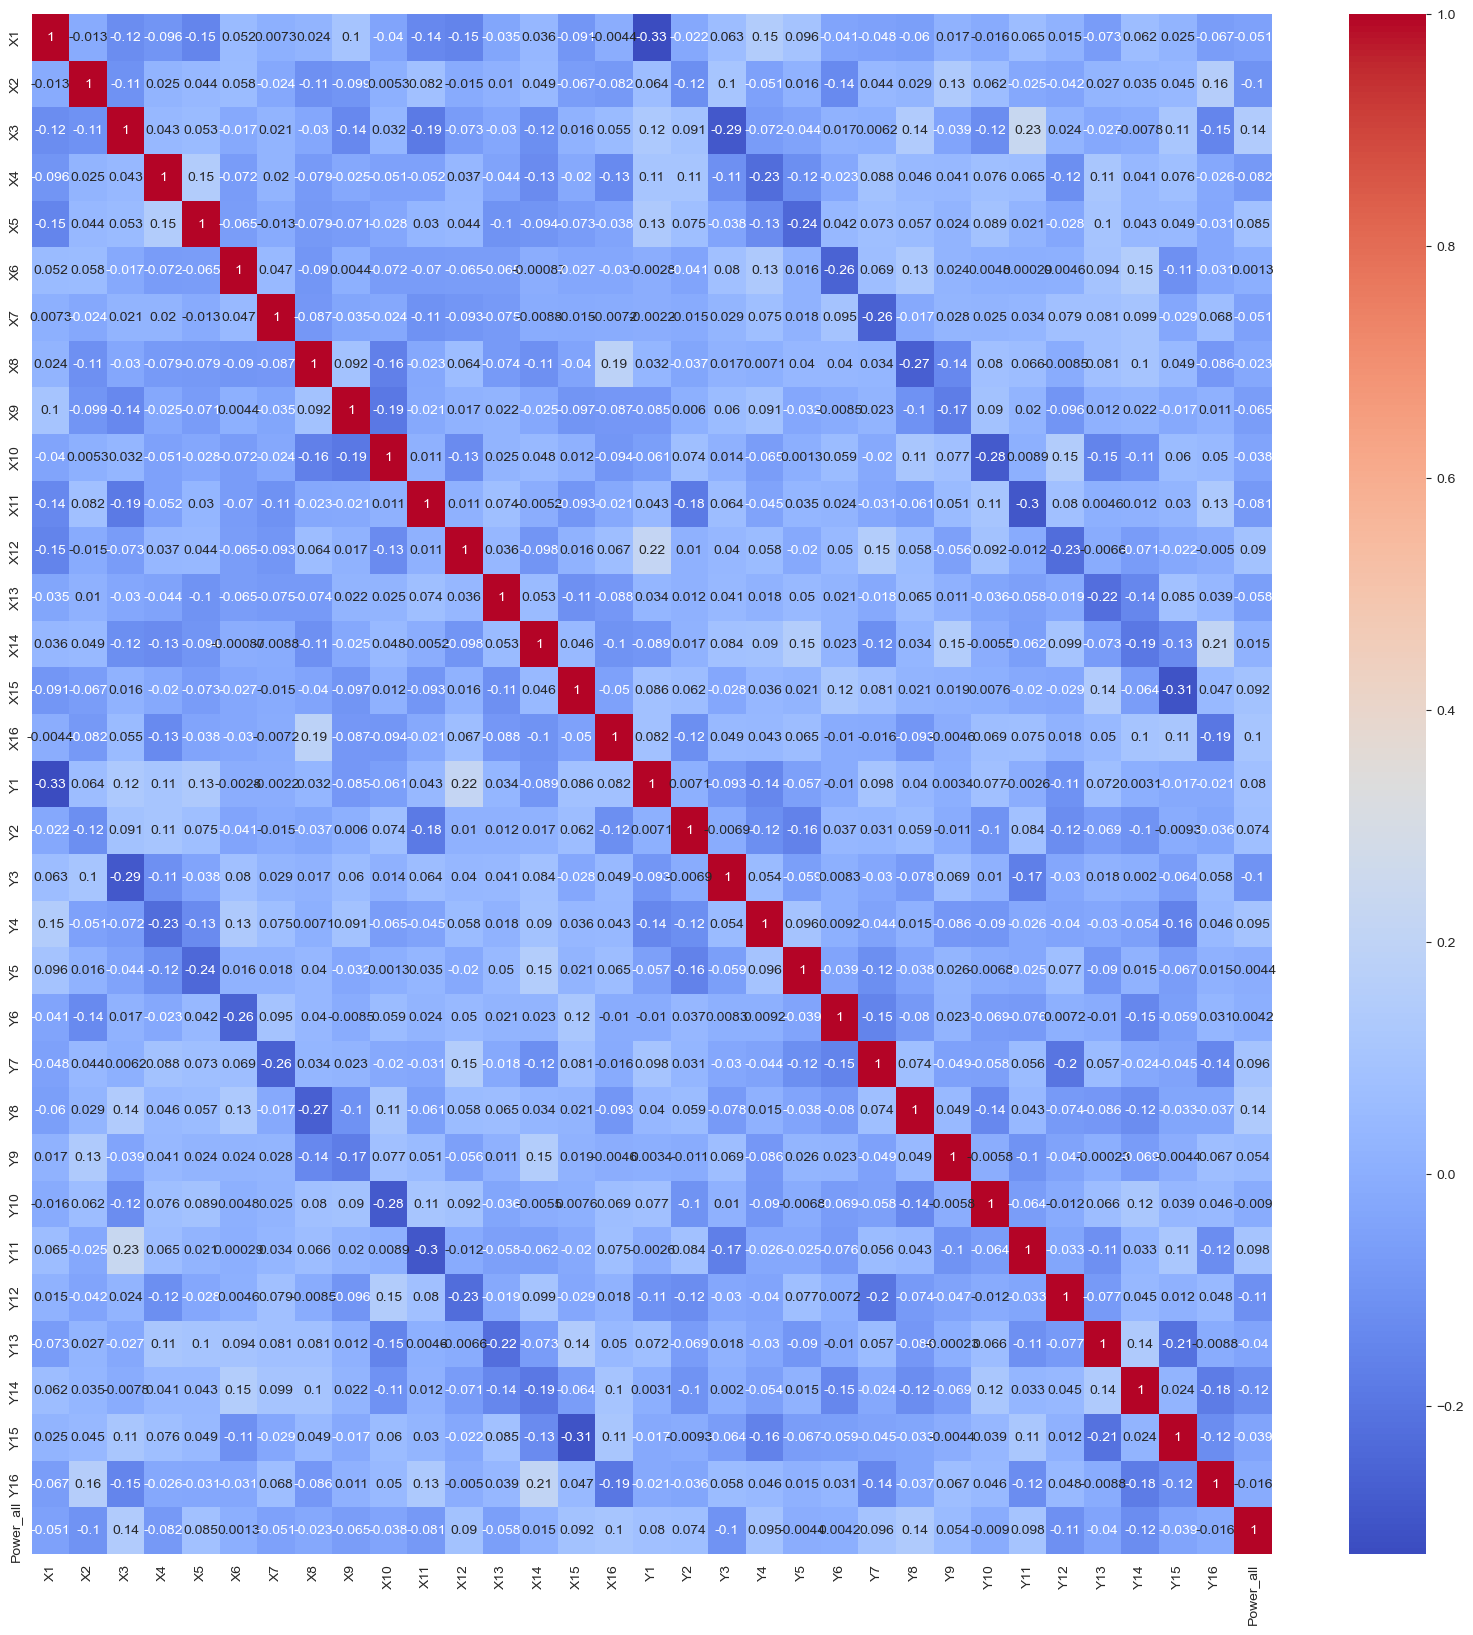

In [5]:
columns_to_remove = [f"P{i}" for i in range(1, 17)]
tasmania_df = tasmania_df.drop(columns=columns_to_remove)
correlation_matrix = tasmania_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
